## This notebook programs in the solution to the first 7 Hermite-Gaussian coefficients. It also uses the results from Section 3 to visualize the standardized approximation error for only using the first Hermite-Gaussian function to model the difference between a Gaussian absorption feature and its Doppler-shifted version.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib notebook

In [3]:
def I0(a, b, c):
    return np.sqrt(np.pi/a)*np.exp(((b**2)/(4*a)) -c)
def I1(a, b, c):
    return (-np.sqrt(np.pi)*b*np.exp(((b**2)/(4*a)) -c))/(2*a**(3/2))
def I2(a, b, c):
    return -b*I1(a, b, c)/(2*a) + I0(a, b, c)/(2*a)
def I3(a, b, c):
    return -b*I2(a, b, c)/(2*a) + 2*I1(a, b, c)/(2*a)
def I4(a, b, c):
    return -b*I3(a, b, c)/(2*a) + 3*I2(a, b, c)/(2*a)
def I5(a, b, c):
    return -b*I4(a, b, c)/(2*a) + 4*I3(a, b, c)/(2*a)
def I6(a, b, c):
    return -b*I5(a, b, c)/(2*a) + 5*I4(a, b, c)/(2*a)

In [4]:
def C0(eps, mu, sig):
    return np.sqrt(sig*np.sqrt(np.pi)) - I0((1 + eps + eps**2)/(sig**2), (-2*mu - eps*mu)/(sig**2), (mu/sig)**2)/np.sqrt(sig*np.sqrt(np.pi))
def C1(eps, mu, sig):
    return (-2*np.sqrt(sig)/np.sqrt(2*np.sqrt(np.pi)))*I1(1 + eps + eps**2, eps*mu/sig + (eps**2)*mu/sig, ((eps*mu/sig)**2)/2)

def C2(eps, mu, sig):
    return (-np.sqrt(sig)/np.sqrt((2**2)*np.math.factorial(2)*np.sqrt(np.pi)))*(4*I2(1 + eps + eps**2, 
                                                                                     eps*mu/sig + (eps**2)*mu/sig, 
         ((eps*mu/sig)**2)/2) - 2*I0(1 + eps + eps**2, eps*mu/sig + (eps**2)*mu/sig, ((eps*mu/sig)**2)/2))

def C3(eps, mu, sig):
    return (-np.sqrt(sig)/np.sqrt((2**3)*np.math.factorial(3)*np.sqrt(np.pi)))*(
    8*I3(1 + eps + eps**2, eps*mu/sig + (eps**2)*mu/sig, 
         ((eps*mu/sig)**2)/2) - 12*I1(1 + eps + eps**2, 
                                     eps*mu/sig + (eps**2)*mu/sig,
                                     ((eps*mu/sig)**2)/2))
def C4(eps, mu, sig):
    return (-np.sqrt(sig)/np.sqrt((2**4)*np.math.factorial(4)*np.sqrt(np.pi)))*(
    16*I4(1 + eps + eps**2, eps*mu/sig + (eps**2)*mu/sig, 
          ((eps*mu/sig)**2)/2) - 48*I2(1 + eps + eps**2, 
                                      eps*mu/sig + (eps**2)*mu/sig,
                                      ((eps*mu/sig)**2)/2) +
      12*I0(1 + eps + eps**2, eps*mu/sig + (eps**2)*mu/sig, 
            ((eps*mu/sig)**2)/2))
def C5(eps, mu, sig):
    return (-np.sqrt(sig)/np.sqrt((2**5)*np.math.factorial(5)*np.sqrt(np.pi)))*(
    32*I5(1 + eps + eps**2, eps*mu/sig + (eps**2)*mu/sig, 
          ((eps*mu/sig)**2)/2) - 160*I3(1 + eps + eps**2, 
                                       eps*mu/sig + (eps**2)*mu/sig,
                                       ((eps*mu/sig)**2)/2) +
      120*I1(1 + eps + eps**2, eps*mu/sig + (eps**2)*mu/sig, 
             ((eps*mu/sig)**2)/2))
def C6(eps, mu, sig):
    return (-np.sqrt(sig)/np.sqrt((2**6)*np.math.factorial(6)*np.sqrt(np.pi)))*(
    64*I6(1 + eps + eps**2, eps*mu/sig + (eps**2)*mu/sig, 
          ((eps*mu/sig)**2)/2) - 480*I4(1 + eps + eps**2, 
                                       eps*mu/sig + (eps**2)*mu/sig,
                                       ((eps*mu/sig)**2)/2) +
      720*I2(1 + eps + eps**2, eps*mu/sig + (eps**2)*mu/sig, 
             ((eps*mu/sig)**2)/2) -
      120*I0(1 + eps + eps**2, eps*mu/sig + (eps**2)*mu/sig, 
             ((eps*mu/sig)**2)/2))

In [5]:
def doppfact(rv):
    return (1 + rv/299792458)

<IPython.core.display.Javascript object>


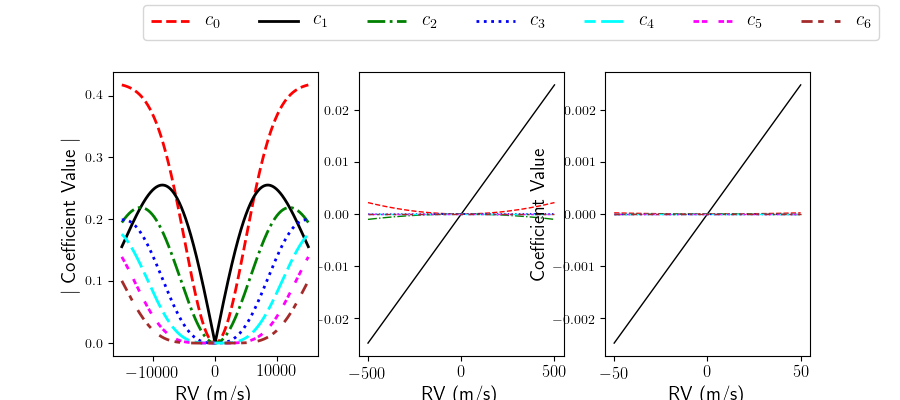

In [25]:
mu0 = 5000
sig0 = 0.1
plt.figure(figsize=(9,4))
plt.rc('text', usetex=True)
plt.gcf().subplots_adjust(top=0.82)
plt.subplot(1,3,2)
rvs = np.linspace(-500, 500, 1000)
epsilon = doppfact(rvs) - 1
plt.plot(rvs, C0(epsilon, mu0, sig0), c='red', ls='--', lw=1)
plt.plot(rvs, C1(epsilon, mu0, sig0), c='black', ls='-', lw=1)
plt.plot(rvs, C2(epsilon, mu0, sig0), c='green', ls='-.', lw=1)
plt.plot(rvs, C3(epsilon, mu0, sig0), c='blue', ls=':', lw=1)
plt.plot(rvs, C4(epsilon, mu0, sig0), c='cyan', dashes = [4, 2, 8, 2], lw=1)
plt.plot(rvs, C5(epsilon, mu0, sig0), c='magenta', dashes = [2,1,2,4], lw=1)
plt.plot(rvs, C6(epsilon, mu0, sig0), c='brown', dashes = [4,2,2,4], lw=1)
plt.xticks(fontsize=12)
plt.yticks(fontsize=10)
plt.xlabel("RV (m/s)", fontsize=14)
plt.ylabel("Coefficient Value", fontsize=14)

plt.subplot(1,3,3)
rvs = np.linspace(-50, 50, 1000)
epsilon = doppfact(rvs) - 1
plt.plot(rvs, C0(epsilon, mu0, sig0), c='red', ls='--', lw=1)
plt.plot(rvs, C1(epsilon, mu0, sig0), c='black', ls='-', lw=1)
plt.plot(rvs, C2(epsilon, mu0, sig0), c='green', ls='-.', lw=1)
plt.plot(rvs, C3(epsilon, mu0, sig0), c='blue', ls=':', lw=1)
plt.plot(rvs, C4(epsilon, mu0, sig0), c='cyan', dashes = [4, 2, 8, 2], lw=1)
plt.plot(rvs, C5(epsilon, mu0, sig0), c='magenta', dashes = [2,1,2,4], lw=1)
plt.plot(rvs, C6(epsilon, mu0, sig0), c='brown', dashes = [4,2,2,4], lw=1)
plt.xticks(fontsize=12)
plt.yticks(fontsize=10)
plt.xlabel("RV (m/s)", fontsize=14)
plt.ylabel("Coefficient Value", fontsize=14)

plt.subplot(1,3,1)
rvs = np.linspace(-15000, 15000, 1000)
epsilon = doppfact(rvs) - 1
plt.plot(rvs, np.absolute(C0(epsilon, mu0, sig0)), c='red', ls='--', lw=2, label=r'$c_{0}$')
plt.plot(rvs, np.absolute(C1(epsilon, mu0, sig0)), c='black', ls='-', lw=2, label=r'$c_{1}$')
plt.plot(rvs, np.absolute(C2(epsilon, mu0, sig0)), c='green', ls='-.', lw=2, label=r'$c_{2}$')
plt.plot(rvs, np.absolute(C3(epsilon, mu0, sig0)), c='blue', ls=':', lw=2, label=r'$c_{3}$')
plt.plot(rvs, np.absolute(C4(epsilon, mu0, sig0)), c='cyan', dashes = [4, 2, 8, 2], lw=2, label=r'$c_{4}$')
plt.plot(rvs, np.absolute(C5(epsilon, mu0, sig0)), c='magenta', dashes = [2,1,2,4], lw=2, label=r'$c_{5}$')
plt.plot(rvs, np.absolute(C6(epsilon, mu0, sig0)), c='brown', dashes = [4,2,2,4], lw=2, label=r'$c_{6}$')
plt.xticks(fontsize=12)
plt.yticks(fontsize=10)
plt.ylabel(r"$|$ Coefficient Value $|$", fontsize=14)
plt.xlabel("RV (m/s)", fontsize=14)
plt.legend(bbox_to_anchor=(0.1, 1.08), fontsize=14, ncol=7)
#plt.tight_layout(w_pad=0.1)
plt.show()

In [26]:
def denom(eps, mu, sig):
    return(sig*np.sqrt(np.pi)*(1 + 1/(1+eps) - 
                               (2**1.5)*np.exp(-(mu**2)*(eps**2)/(2*(sig**2)*(2 + 2*eps + eps**2)))/np.sqrt(2 + 2*eps + eps**2)))

<IPython.core.display.Javascript object>


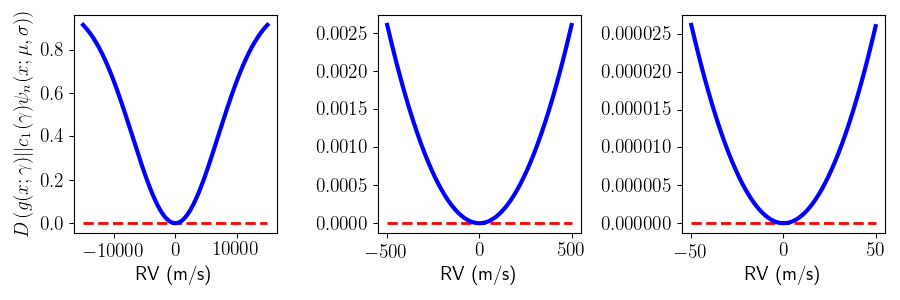

In [27]:
mu0 = 5000
sig0 = 0.1
plt.figure(figsize=(9,3))
plt.rc('text', usetex=True)
plt.subplot(1,3,1)
rv = np.linspace(-15000, 15000, 1000)
epsilon1 = doppfact(rv) - 1
plt.plot(rv, 1 - (C1(epsilon1, mu0, sig0)**2)/denom(epsilon1, mu0, sig0), c='blue', lw=3)
plt.hlines(1/(1 + (2*mu0**2)/(3*sig0**2)), np.min(rv), np.max(rv), colors='red', lw=2, linestyles='--')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("RV (m/s)", fontsize=14)
plt.ylabel(r"$D\left( g(x; \gamma) || c_{1}(\gamma) \psi_{n}(x ; \mu, \sigma) \right)$", fontsize=14, fontweight='bold')

plt.subplot(1,3,2)
rv = np.linspace(-500, 500, 1000)
epsilon1 = doppfact(rv) - 1
plt.plot(rv, 1 - (C1(epsilon1, mu0, sig0)**2)/denom(epsilon1, mu0, sig0), c='blue', lw=3)
plt.hlines(1/(1 + (2*mu0**2)/(3*sig0**2)), np.min(rv), np.max(rv), colors='red', lw=2, linestyles='--')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("RV (m/s)", fontsize=14)

plt.subplot(1,3,3)
rv = np.hstack((np.linspace(-50, -1.5, 500), np.linspace(1.5, 50, 500)))
epsilon1 = doppfact(rv) - 1
plt.plot(rv, 1 - (C1(epsilon1, mu0, sig0)**2)/denom(epsilon1, mu0, sig0), c='blue', lw=3)
plt.hlines(1/(1 + (2*mu0**2)/(3*sig0**2)), np.min(rv), np.max(rv), colors='red', lw=2, linestyles='--')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("RV (m/s)", fontsize=14)
plt.tight_layout()
plt.show()